# Laboratorio Optimización No. 10

> Daniel Alvarez - 201911320  
Maria Jose Vieda - 201923359

### Importacion de Librerias:

In [4]:
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import sympy as sym

In [3]:
def f(x, y):
    return 3*(1-x)**2*np.exp(-(x**2)-(y+1)**2)-10*((x/5)-x**3 - y**5)*np.exp(-x**2 -y**2)-(1/3)*np.exp(-(x+1)**2 - y**2)
    
def pem(p1, p2, x):
    m = (p2[-1] - p1[-1])/(p2[0] - p1[0])
    b = p1[-1] - m*p1[0]
    return m*x + b

In [5]:
resolution = 1000
x = np.linspace(-5, 5, resolution)

In [6]:
x1 = np.array([[1/10, 1],[-11/10, 17/10],[1, -1],[0, 13/5]])
y = np.array([[-11/10, -1],[12/10, -17/10],[-16/10, 3/5],[0, -12/5]])
#x2[0,:]

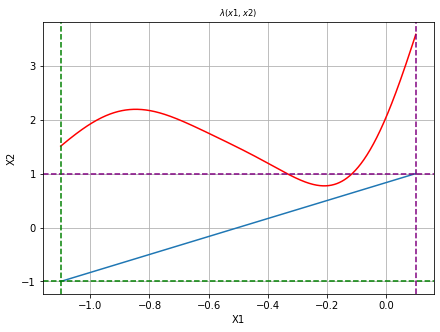

In [31]:
class graph_2D:

    def __init__(self, fun, p1, p2, r):

        self.resolution = r
        if p1[0] < p2[0]:
            self.x = np.linspace(p1[0], p2[0], self.resolution)
        else:
            self.x = np.linspace(p2[0], p1[0], self.resolution)
        self.fun = fun
        self.p1 = p1
        self.p2 = p2
        
    def graph(self):
        
        plt.figure(figsize=(7,5))
        plt.plot(self.x, self.fun(self.x,pem(self.p1, self.p2, self.x)), color ='red')
        plt.plot(self.x, pem(self.p1, self.p2, self.x))
        # ax = plt.contour(self.x, pem(self.p1, self.p2, self.x), self.fun(self.x,pem(self.p1, self.p2, self.x)))
        # plt.colorbar(ax, shrink=0.5, aspect=5)
        plt.axhline(y = self.p1[-1], color = 'purple', linestyle = '--')
        plt.axhline(y = self.p2[-1], color = 'g', linestyle = '--')
        plt.axvline(x = self.p1[0], color = 'purple', linestyle = '--')
        plt.axvline(x = self.p2[0], color = 'g', linestyle = '--')
        plt.grid()
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(r'$\lambda(x1,x2)$', fontsize='small')
        plt.show()

if __name__ == '__main__':
    U = 0    
    graph = graph_2D(f, x1[U,:], y[U,:], 1000)
    graph.graph()

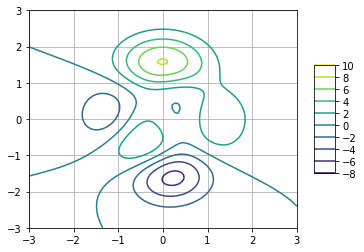

In [37]:
feature_x = np.linspace(-3, 3, 100) 
feature_y = np.linspace(-3, 3, 100) 
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
z = f(X, Y)
ax = plt.contour(X, Y, z)
plt.colorbar(ax, shrink=0.5, aspect=5)
plt.grid()
plt.show()